## Electricity Usage and Feed In Analysis

This notebook contains a visualisation of the electricity usage and electricity fed back into the network at 3 different addresses: 1MC, 23OLR, and Ardamine.

In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

In [2]:
# load data
usage_data_23 = pd.read_csv('data/electricity.csv', header=1, index_col=0, parse_dates=True).T
usage_data_1mc = pd.read_csv('data/1MC2024.csv', header=1, index_col=0, parse_dates=True).T
usage_data_arda = pd.read_csv('data/Ardamine 2024.csv', header=1, index_col=0, parse_dates=True).T
import_export_data_1mc = pd.read_csv('data/HDF_calckWh_10000826638_26-02-2025.csv', parse_dates=True, dayfirst=True, index_col=4)
import_export_data_23 = pd.read_csv('data/HDF_calckWh_10000847339_26-02-2025.csv', parse_dates=True, dayfirst=True, index_col=4)

In [3]:
# import_export_data_1mc.groupby(['Read Type', pd.Grouper(freq='D')]).sum()
import_data_1mc_day = import_export_data_1mc[import_export_data_1mc['Read Type'] == 'Active Import Interval (kWh)'].resample('D').sum()['Read Value']
export_data_1mc_day = import_export_data_1mc[import_export_data_1mc['Read Type'] == 'Active Export Interval (kWh)'].resample('D').sum()['Read Value']

In [4]:
# # Process usage data
usage_data_23_day = usage_data_23.sum()
usage_data_1mc_day = usage_data_1mc.sum()
usage_data_arda_day = usage_data_arda.sum()

# Calculate monthly averages
usage_data_23_month_avg = usage_data_23_day.resample('ME').mean()
usage_data_1mc_month_avg = usage_data_1mc_day.resample('ME').mean()
usage_data_arda_month_avg = usage_data_arda_day.resample('ME').mean()

# Process import/export data
import_data_1mc_day = import_export_data_1mc[import_export_data_1mc['Read Type'] == 'Active Import Interval (kWh)'].resample('D').sum()['Read Value']
export_data_1mc_day = import_export_data_1mc[import_export_data_1mc['Read Type'] == 'Active Export Interval (kWh)'].resample('D').sum()['Read Value']
export_data_1mc_month_avg = export_data_1mc_day.resample('MS').mean()

# Process import/export data for 2023
import_data_23_day = import_export_data_23[import_export_data_23['Read Type'] == 'Active Import Interval (kWh)'].resample('D').sum()['Read Value']
export_data_23_day = import_export_data_23[import_export_data_23['Read Type'] == 'Active Export Interval (kWh)'].resample('D').sum()['Read Value']
export_data_23_month = export_data_23_day.resample('MS').sum()
export_data_23_month_avg = export_data_23_day.resample('MS').mean()

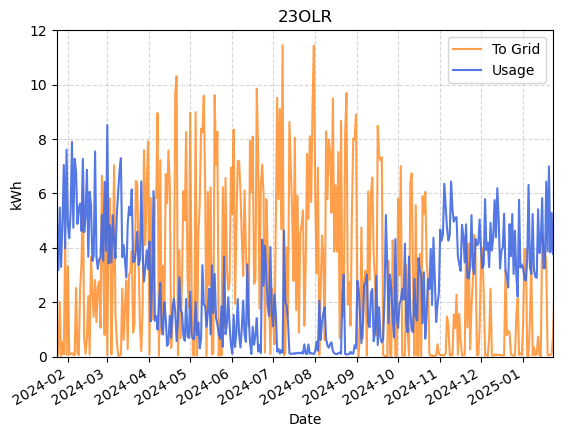

In [5]:
# Plot data for 23OLR
fig, ax = plt.subplots()
months = mdates.MonthLocator()

ax.plot(export_data_23_day.index, export_data_23_day, label='To Grid', color='tab:orange', alpha=0.75)
ax.plot(usage_data_23_day.index, usage_data_23_day, label='Usage', color='royalblue', alpha=0.9)
ax.xaxis.set_major_locator(months)
fig.autofmt_xdate()
plt.title('23OLR')
plt.gca().set_xbound(datetime.date(2024, 1, 24),datetime.date(2025, 1, 23))
plt.gca().set_ybound(0,12)
plt.xlabel('Date')
plt.ylabel('kWh')
plt.grid(visible=True, which='major', axis='both', linestyle='--', alpha=0.5)
plt.legend()
plt.show()

# https://matplotlib.org/2.0.2/examples/api/date_demo.html

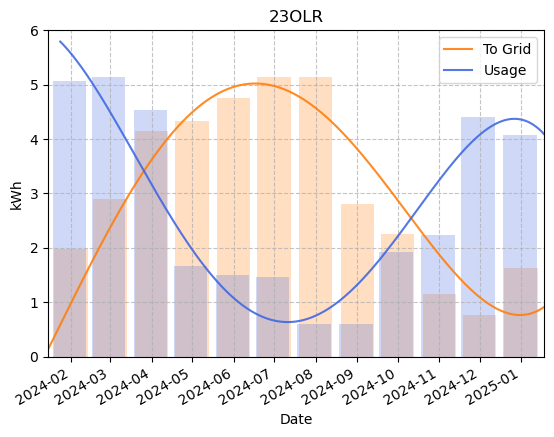

In [12]:
# Plot data for 23OLR with trend lines and monthly averages

fig, ax = plt.subplots()
months = mdates.MonthLocator()

x1 = export_data_23_day.index
xd1 = mdates.date2num(x1)
y1 = export_data_23_day
x2 = usage_data_23_day.index
xd2 = mdates.date2num(x2)
y2 = usage_data_23_day

x3 = export_data_23_month_avg.index
y3 = export_data_23_month_avg
x4 = usage_data_23_month_avg.index
y4 = usage_data_23_month_avg

p1 = np.poly1d(np.polyfit(xd1, y1, 4))
p2 = np.poly1d(np.polyfit(xd2, y2, 4))
xp1 = np.linspace(xd1.min(), xd1.max(), 413)
xp2 = np.linspace(xd2.min(), xd2.max(), 367)

dd1 = mdates.num2date(xp1)
dd2 = mdates.num2date(xp2)

ax.plot(dd1, p1(xp1), label='To Grid', color='tab:orange', alpha=0.9)
plt.bar(x3,y3, width=25, alpha=0.25, color='tab:orange')
ax.plot(dd2, p2(xp2), label='Usage', color='royalblue', alpha=0.9)
plt.bar(x4,y4, width=25, alpha=0.25, color='royalblue')
ax.xaxis.set_major_locator(months)
fig.autofmt_xdate()
plt.title('23OLR')
plt.gca().set_xbound(datetime.date(2024, 1, 15),datetime.date(2025, 1, 18))
plt.gca().set_ybound(0,6)
plt.xlabel('Date')
plt.ylabel('kWh')
plt.grid(visible=True, which='major', axis='both', linestyle='--', alpha=0.75)
plt.legend()
plt.show()

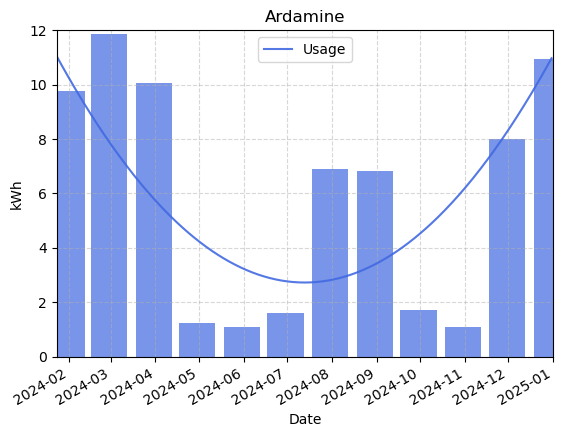

In [20]:
# Plot data for Ardamine with trend lines and monthly averages

x = usage_data_arda_day.index
y = usage_data_arda_day

x1 = usage_data_arda_day.index
xd1 = mdates.date2num(x1)
y1 = usage_data_arda_day

x2 = usage_data_arda_month_avg.index
y2 = usage_data_arda_month_avg

p1 = np.poly1d(np.polyfit(xd1, y1, 2))
xp1 = np.linspace(xd1.min(), xd1.max(), 366)

dd1 = mdates.num2date(xp1)

fig, ax = plt.subplots()
months = mdates.MonthLocator()
ax.plot(dd1, p1(xp1), label='Usage', color='royalblue', alpha=0.9)
ax.bar(x2, y2, width=25, color='royalblue', alpha=0.7)
ax.xaxis.set_major_locator(months)
ax.set_xbound(datetime.date(2024, 1, 24),datetime.date(2025, 1, 1))
ax.set_ybound(0,12)
fig.autofmt_xdate()
plt.xlabel('Date')
plt.ylabel('kWh')
plt.grid(visible=True, which='major', axis='both', linestyle='--', alpha=0.5)
plt.legend()
plt.title('Ardamine')
plt.show()

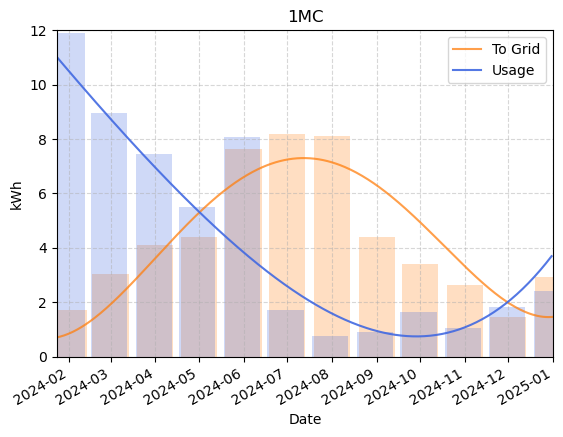

In [18]:
# Plot data for 1MC with trend lines and monthly averages

fig, ax = plt.subplots()
months = mdates.MonthLocator()

x1 = export_data_1mc_day.index
y1 = export_data_1mc_day
x2 = usage_data_1mc_day.index
y2 = usage_data_1mc_day
x3 = export_data_1mc_month_avg.index
y3 = export_data_1mc_month_avg
x4 = usage_data_1mc_month_avg.index
y4 = usage_data_1mc_month_avg

xd1 = mdates.date2num(x1)
xd2 = mdates.date2num(x2)

p1 = np.poly1d(np.polyfit(xd1, y1, 4))
p2 = np.poly1d(np.polyfit(xd2, y2, 4))
xp1 = np.linspace(xd1.min(), xd1.max(), 413)
xp2 = np.linspace(xd2.min(), xd2.max(), 366)

dd1 = mdates.num2date(xp1)
dd2 = mdates.num2date(xp2)

ax.plot(dd1, p1(xp1), label='To Grid', color='tab:orange', alpha=0.75)
plt.bar(x3,y3, width=25, alpha=0.25, color='tab:orange')
ax.plot(dd2, p2(xp2), label='Usage', color='royalblue', alpha=0.9)
plt.bar(x4,y4, width=25, alpha=0.25, color='royalblue')

ax.plot()

ax.xaxis.set_major_locator(months)
fig.autofmt_xdate()
plt.title('1MC')
plt.gca().set_xbound(datetime.date(2024, 1, 24),datetime.date(2025, 1, 1))
plt.gca().set_ybound(0,12)
plt.xlabel('Date')
plt.ylabel('kWh')
plt.grid(visible=True, which='major', axis='both', linestyle='--', alpha=0.5)
plt.legend()
plt.show()